In [ ]:
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q torch
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q pyarrow==13.0.0
!pip install -q datasets
!pip install wandb

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.9 MB/s eta 0

In [ ]:
!git clone https://github.com/huggingface/trl.git
%cd trl/
!pip install .

Cloning into 'trl'...
remote: Enumerating objects: 6282, done.
remote: Counting objects: 100% (2426/2426), done.
remote: Compressing objects: 100% (558/558), done.
remote: Total 6282 (delta 2145), reused 1966 (delta 1846), pack-reused 3856
Receiving objects: 100% (6282/6282), 6.25 MiB | 16.32 MiB/s, done.
Resolving deltas: 100% (4165/4165), done.
/content/trl
Processing /content/trl
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.1 MB/s eta 0:00:00
  Created wheel for trl: filename=trl-0.8.2.dev0-py3-none-any.whl size=238317 sha256=51495f6902729ee5fd54b4584b38f755b76bf1a83a8699f2447ea629f997deb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-9w0c0pog/wheels/6b/25/27/3b1530fe7be4495c561eaab87402fdaffaf39de50283890e8e
Successfully built trl


In [ ]:
%cd ..

/content


In [ ]:
import wandb
from google.colab import userdata, drive

# Defined in the secrets tab in Google Colab
hf_token = userdata.get('HuggingFace')
wb_token = userdata.get('wandb')
wandb.login(key=wb_token)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from huggingface_hub import whoami

user = whoami(token=hf_token)['name']

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
from typing import TypeVar, List, Tuple, Dict, NoReturn
from datasets import DatasetDict, Dataset, IterableDatasetDict, IterableDataset

T = TypeVar("T")

DataPointType=DatasetDict | Dataset | IterableDatasetDict | IterableDataset
DataPointTrain =Dataset | List | T
DataPointTest =Dataset | List | T

from transformers.models.llama.tokenization_llama_fast import LlamaTokenizerFast
from transformers.models.mistral.modeling_mistral import MistralForCausalLM

In [ ]:
# BASE_MODEL_NAME = "mistralai/Mistral-7B-v0.1"
BASE_MODEL_NAME="mistralai/Mistral-7B-Instruct-v0.2"

OUTPUT_DIR_NAME = "Abstract_Layer_Planning_Decompn_Mistral_7B"
ADAPTER_CHECKPOINTS_NAME = "ckpts_mistral_7B_abstract_layer_planning_decompn"

In [ ]:
from transformers import AutoTokenizer

def load_tokenizer(model_id: str = BASE_MODEL_NAME)->LlamaTokenizerFast:
    tokenizer = AutoTokenizer.from_pretrained(model_id, add_eos_token=True)

    # Check if the pad token is already in the tokenizer
    if '[<pad>]' not in tokenizer.get_vocab():
        # Add the pad token
        tokenizer.add_tokens(['[<pad>]'])
        print("Added pad token")

    # Set the pad token
    tokenizer.pad_token = '[<pad>]'

    tokenizer.padding_side='left'

    # Print the pad token ids
    print('Tokenizer pad token ID:', tokenizer.pad_token_id)
    return tokenizer

In [ ]:
tokenizer=load_tokenizer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

Added pad token
Tokenizer pad token ID: 32000


In [ ]:
print("EOS token:", tokenizer.eos_token)
print("EOS token id:", tokenizer.eos_token_id)

print("Pad token: ", tokenizer.pad_token)
print("Pad token ID: ", tokenizer.pad_token_id)

print(tokenizer)

EOS token: </s>
EOS token id: 2
Pad token:  [<pad>]
Pad token ID:  32000
LlamaTokenizerFast(name_or_path='mistralai/Mistral-7B-Instruct-v0.2', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '[<pad>]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	32000: AddedToken("[<pad>]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}


In [ ]:
from datasets import load_dataset

def custom_dataset_load(data_dir: str)->DataPointType:
    data = load_dataset(data_dir, split="train")
    return data

In [ ]:
def format_dataset_abstract_fn(data_points: DataPointType)->DataPointType:
    system_prompt="Below is an instruction that describes a composite task. Your response should fulfill the instruction by providing a structured breakdown of the composite task into distinct subtasks."
    INST="### Instruction:"
    RESP="### Response:"

    # Create the formatted text
    formatted_dataset = data_points.map(
        lambda x: {
            "prompt": "".join(
                [
                    f"{system_prompt}\n\n",
                    f"{INST}{x['instruction'].strip()}\n\n",
                    f"{RESP}{x['output-abstract'].strip()}",
                ]
            ),
            "response": "".join(
                [
                    f"{RESP}{x['output-abstract'].strip()}",
                ]
            ),
        }
    )
    return formatted_dataset

In [ ]:
def format_dataset_abstract_instruct_fn(data_points: DataPointType)->DataPointType:
    template="Below is an instruction that describes a composite task. Your response should fulfill the instruction by providing a structured breakdown of the composite task into distinct subtasks."
    B_INST,E_INST="[INST]","[/INST]"
    RESP="### Response:"

    # Create the formatted text
    formatted_dataset = data_points.map(
        lambda x: {
            "prompt": "".join(
                [
                    f"{B_INST}{template.strip()}{x['instruction'].strip()}{E_INST}\n\n",
                    f"{RESP}{x['output-abstract'].strip()}",
                ]
            ),
            "response": "".join(
                [
                    f"{RESP}{x['output-abstract'].strip()}",
                ]
            ),
        }
    )
    return formatted_dataset

In [ ]:
def shuffle_tokenize_batch(data:DataPointType, tokenizer:LlamaTokenizerFast)->DataPointType:
    data = data.shuffle(seed=1234)  # Shuffle dataset here
    data = data.map(lambda samples: tokenizer(samples["prompt"]), batched=True)
    return data

In [ ]:
def split_train_test_dataset(data:DataPointType, split_size: float = 0.1)->Tuple[DataPointTrain,DataPointTest]:
    data = data.train_test_split(test_size=split_size)
    train_data = data["train"]
    test_data = data["test"]
    return train_data, test_data

In [ ]:
def format_prediction_fn(data_point: DataPointType)->str:
    system_prompt="Below is an instruction that describes a composite task. Your response should fulfill the instruction by providing a structured breakdown of the composite task into distinct subtasks."
    INST="### Instruction:"
    RESP="### Response:"

    # Create the formatted text
    formatted_prediction = "".join(
                [
                    f"{system_prompt}\n\n",
                    f"{INST}{data_point['instruction'].strip()}\n\n",
                    f"{RESP}",
                ]
            )
    return formatted_prediction

In [ ]:
def format_prediction_instruct_fn(data_point: DataPointType)->str:
    template="Below is an instruction that describes a composite task. Your response should fulfill the instruction by providing a structured breakdown of the composite task into distinct subtasks."
    B_INST,E_INST="[INST]","[/INST]"
    RESP="### Response:"

    # Create the formatted text
    formatted_prediction = "".join(
                [
                    f"{B_INST}{template.strip()}{data_point['instruction'].strip()}{E_INST}\n\n",
                    f"{RESP}",
                ]
            )
    return formatted_prediction

In [ ]:
import torch
from transformers import StoppingCriteria

class KeywordsStoppingCriteria(StoppingCriteria):
    def __init__(self, keywords, tokenizer, input_ids):
        self.keywords = keywords
        self.keyword_ids = []
        self.max_keyword_len = 0
        for keyword in keywords:
            cur_keyword_ids = tokenizer(keyword).input_ids
            if len(cur_keyword_ids) > 1 and cur_keyword_ids[0] == tokenizer.bos_token_id:
                cur_keyword_ids = cur_keyword_ids[1:]
            if len(cur_keyword_ids) > self.max_keyword_len:
                self.max_keyword_len = len(cur_keyword_ids)
            self.keyword_ids.append(torch.tensor(cur_keyword_ids))
        self.tokenizer = tokenizer
        self.start_len = input_ids.shape[1]

    def call_for_batch(self, output_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        offset = min(output_ids.shape[1] - self.start_len, self.max_keyword_len)
        self.keyword_ids = [keyword_id.to(output_ids.device) for keyword_id in self.keyword_ids]
        for keyword_id in self.keyword_ids:
            if (output_ids[0, -keyword_id.shape[0]:] == keyword_id).all():
                return True
        outputs = self.tokenizer.batch_decode(output_ids[:, -offset:], skip_special_tokens=True)[0]
        for keyword in self.keywords:
            if keyword in outputs:
                return True
        return False

    def __call__(self, output_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        outputs = []
        for i in range(output_ids.shape[0]):
            outputs.append(self.call_for_batch(output_ids[i].unsqueeze(0), scores))
        return all(outputs)

In [ ]:
def get_completion(prompt:str, model:MistralForCausalLM, tokenizer:LlamaTokenizerFast, keywords:List[str], keyword_stopping_criteria:KeywordsStoppingCriteria)->str:
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(model.device)

    stopping_criteria = keyword_stopping_criteria(keywords, tokenizer, input_ids)

    with torch.inference_mode():
      output_ids = model.generate(
          inputs=input_ids,
          use_cache=True,
          max_new_tokens=512,
          stopping_criteria=[stopping_criteria],
          attention_mask=None,
          do_sample=False,
          output_attentions=True,
          output_scores=True,
          return_dict_in_generate=True,
      )

    output = tokenizer.decode(output_ids['sequences'][0, input_ids.shape[1]:],skip_spectial_tokens=True).strip()

    return output

In [ ]:
data=custom_dataset_load('/content/drive/MyDrive/data_multi_layer_planning')

Resolving data files:   0%|          | 0/50 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
data_abstr=format_dataset_abstract_instruct_fn(data)

Map:   0%|          | 0/1017 [00:00<?, ? examples/s]

In [ ]:
processed_data_abstr=shuffle_tokenize_batch(data_abstr,tokenizer)

Map:   0%|          | 0/1017 [00:00<?, ? examples/s]

In [ ]:
processed_df_abstr = processed_data_abstr.to_pandas()
processed_df_abstr.head(5)

,output-detail,output-abstract,instruction,prompt,response,input_ids,attention_mask
0,1. DIY Recycling Projects: Create step-by-step...,"1. DIY Recycling Projects, 2. Downloadable Gui...",Produce a series of educational videos on sust...,[INST]Below is an instruction that describes a...,"### Response:1. DIY Recycling Projects, 2. Dow...","[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1. 3D Models: Create detailed 3D renderings of...,"1. 3D Models, 2. DIY Tutorial Videos, 3. Writt...",Design a home renovation guide including 3D mo...,[INST]Below is an instruction that describes a...,"### Response:1. 3D Models, 2. DIY Tutorial Vid...","[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,1. Conference Website: Design a website listin...,"1. Conference website, 2. Promotional video, 3...","Organize a virtual conference, including a web...",[INST]Below is an instruction that describes a...,"### Response:1. Conference website, 2. Promoti...","[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,1. Digital Paintings: A series of high-resolut...,"1. Digital Paintings, 2. Explanatory Guide, 3....",Produce a digital art exhibition exploring the...,[INST]Below is an instruction that describes a...,"### Response:1. Digital Paintings, 2. Explanat...","[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,1. Collection Theme: Develop a captivating nar...,"1. Collection Theme, 2. Fashion Sketches, 3. R...",Launch a fashion line including the collection...,[INST]Below is an instruction that describes a...,"### Response:1. Collection Theme, 2. Fashion S...","[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
train_data_abstr,test_data_abstr=split_train_test_dataset(processed_data_abstr)

In [ ]:
print(len(train_data_abstr),len(test_data_abstr))

915 102


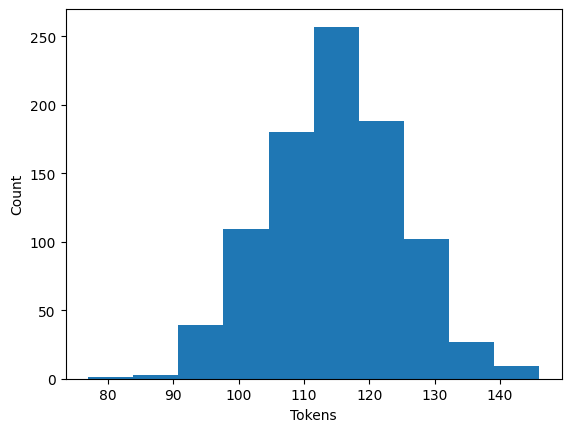

In [ ]:
from matplotlib import pyplot as plt

token_counts = []
for example in train_data_abstr:
    token_counts.append(
        len(tokenizer(example['prompt'], add_special_tokens=True, return_attention_mask=False)["input_ids"])
    )
plt.hist(token_counts)
plt.xlabel("Tokens")
plt.ylabel("Count")
plt.show();

In [ ]:
import torch
from transformers import AutoModelForCausalLM,BitsAndBytesConfig

def load_model(model_id: str = BASE_MODEL_NAME,device_map:Dict[str,int]={"": 0})->MistralForCausalLM:

    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
    )

    model = AutoModelForCausalLM.from_pretrained(
        model_id, quantization_config=bnb_config, device_map=device_map
    )
    return model

In [ ]:
model=load_model()

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
# Resize token embeddings
model.resize_token_embeddings(len(tokenizer))

# Update pad token id in model and its config
model.pad_token_id = tokenizer.pad_token_id
model.config.pad_token_id = tokenizer.pad_token_id

# Check if they are equal
assert model.pad_token_id == tokenizer.pad_token_id, "The model's pad token ID does not match the tokenizer's pad token ID"

In [ ]:
stop_keywords = ["</s>"," </s>", "</s> "]

In [ ]:
pred_prompt=format_prediction_instruct_fn(test_data_abstr[0])
print(pred_prompt)

[INST]Below is an instruction that describes a composite task. Your response should fulfill the instruction by providing a structured breakdown of the composite task into distinct subtasks.Compose a meditation guide combining soothing background tracks (audio), calming imagery (image), guided meditation scripts (text), and instructional meditation videos (video).[/INST]

### Response:


In [ ]:
output_base=get_completion(pred_prompt, model, tokenizer, stop_keywords, KeywordsStoppingCriteria)
print(output_base)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
MistralModel is using MistralSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


[<pad>][<pad>][<pad>][<pad>][<pad>][<pad>] Meditation Guide Composition

To create a comprehensive meditation guide, we will combine soothing background tracks (audio), calming imagery (image), guided meditation scripts (text), and instructional meditation videos (video). Here's a structured breakdown of the composite task into distinct subtasks:

#### 1. Selection of Soothing Background Tracks (Audio)

* Research and curate a collection of calming background tracks, such as ambient music, nature sounds, or white noise.
* Ensure the audio files are of high quality and free from copyright restrictions.
* Organize the tracks into different categories, such as forest sounds, ocean waves, or instrumental music.

#### 2. Creation of Calming Imagery (Image)

* Design or source high-quality, visually appealing images that evoke a sense of calm and relaxation.
* Create a collection of images that can be used as a visual aid during meditation practice.
* Ensure the images are of high resolution

In [ ]:
from peft import prepare_model_for_kbit_training,get_peft_model

def prepare_model_for_qlora_training(model:MistralForCausalLM,lora_config)->MistralForCausalLM:
  # Enable gradient checkpointing for the model
  model.gradient_checkpointing_enable()

  # Prepare the model for k-bit training using the "prepare_model_for_kbit_training" function
  model = prepare_model_for_kbit_training(model)

  # Get a model with LoRA applied to it using the defined configuration
  model = get_peft_model(model, lora_config)

  return model

In [ ]:
def print_trainable_parameters(model:MistralForCausalLM)->NoReturn:
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    # Iterate through model parameters
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    # Print the number of trainable parameters, total parameters, and the percentage of trainable parameters
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [ ]:
from trl import DataCollatorForCompletionOnlyLM

def custom_collator(tokenizer:LlamaTokenizerFast,response_template_with_context:str = "\n### Response:"):
  response_template_ids = tokenizer.encode(response_template_with_context, add_special_tokens=False)[2:]
  collator = DataCollatorForCompletionOnlyLM(response_template_ids, tokenizer=tokenizer)
  return collator

In [ ]:
from transformers import Trainer

def qlora_training_with_custom_collator(training_args,model:MistralForCausalLM,tokenizer:LlamaTokenizerFast,train_data,test_data,collator):
  # Create a trainer for fine-tuning a model
  trainer = Trainer(
      model=model,               # The model to be trained
      train_dataset=train_data,  # Training dataset
      eval_dataset=test_data,    # Evaluation dataset
      args=training_args,
      data_collator=collator,    # Custom data collator for completion
  )

  model.config.use_cache = False  # silence the warnings. Please re-enable for inference!

  trainer.train()

  return trainer, tokenizer, model

In [ ]:
from peft import LoraConfig

# Define a configuration for the LoRA (Learnable Requantization Activation) method
lora_config = LoraConfig(
    r=8,                                   # Number of quantization levels
    lora_alpha=32,                         # Hyperparameter for LoRA
    target_modules=["q_proj",
                    "k_proj",
                    "v_proj",
                    "o_proj",
                    "gate_proj",
                    "up_proj",
                    "down_proj"
                    ],             # Modules to apply LoRA to
    lora_dropout=0.05,                     # Dropout probability
    bias="none",                           # Type of bias
    task_type="CAUSAL_LM"                  # Task type (in this case, Causal Language Modeling)
)

In [ ]:
from transformers import TrainingArguments

In [ ]:
# Define a configuration for the training
training_args_abstr=TrainingArguments(
        per_device_train_batch_size=4,        # Batch size per device during training
        gradient_accumulation_steps=4,        # Number of gradient accumulation steps
        gradient_checkpointing=True,
        warmup_ratio = 0.03 ,                 # Number of warm-up steps for learning rate
        max_steps=60,                        # Maximum number of training steps
        learning_rate=5e-5,                   # Learning rate
        lr_scheduler_type="cosine",           # cosine learning rate scheduler
        # bf16=True,                          # Enable mixed-precision training (Amper GPU)
        fp16=True,
        logging_steps=1,                      # Logging frequency during training
        output_dir=OUTPUT_DIR_NAME,           # Directory to save output files
        optim="paged_adamw_32bit",            # Optimizer type
        save_strategy="epoch",                # Strategy for saving checkpoints
        # push_to_hub=True                    # Push to the Hugging Face model hub
        report_to="wandb",
        do_eval=True,
        evaluation_strategy="steps",
        eval_steps=5,
    )

In [ ]:
model = prepare_model_for_qlora_training(model,lora_config)

In [ ]:
# Print the number of trainable parameters in the model after applying LoRA
print_trainable_parameters(model)

trainable params: 20971520 || all params: 3773050880 || trainable%: 0.5558239384251293


In [ ]:
collator=custom_collator(tokenizer)

In [ ]:
wandb.init(project="fine-tune mistral 7b for abstract layer task decomposition", name="decompose_task_abstr_layer")

wandb: Currently logged in as: ashmsn8665. Use `wandb login --relogin` to force relogin


In [ ]:
# Start QLORA fine-tuning for the abstract data (i.e., easy task or layer-1 planning)
trainer, tokenizer, model = qlora_training_with_custom_collator(training_args_abstr,model,tokenizer,train_data_abstr,test_data_abstr,collator)

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss
5,3.388300,2.819277
10,1.304700,0.820556
15,0.160300,0.163567
20,0.224500,0.156817
25,0.163300,0.148729
30,0.127000,0.140681
35,0.234100,0.142507
40,0.168600,0.135230
45,0.113800,0.135338
50,0.118100,0.132518


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:168: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:168: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


In [ ]:
# Good practice to end your run
wandb.finish()

eval/loss,█▃▁▁▁▁▁▁▁▁▁▁
eval/runtime,▁▄▆▆▆▅▅▅▆█▅▅
eval/samples_per_second,█▅▃▃▃▄▄▃▃▁▄▄
eval/steps_per_second,█▅▃▃▃▄▄▄▃▁▄▄
train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
train/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
train/grad_norm,█ ▆▄▃▃▃▇▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/learning_rate,▄▄███████▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
train/loss,▇█▇▅▄▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/loss,0.13083
eval/runtime,5.9361


In [ ]:
# Save artifacts
trainer.model.save_pretrained(ADAPTER_CHECKPOINTS_NAME)
tokenizer.save_pretrained(ADAPTER_CHECKPOINTS_NAME)

/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:168: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


('ckpts_mistral_7B_abstract_layer_planning_decompn/tokenizer_config.json',
 'ckpts_mistral_7B_abstract_layer_planning_decompn/special_tokens_map.json',
 'ckpts_mistral_7B_abstract_layer_planning_decompn/tokenizer.model',
 'ckpts_mistral_7B_abstract_layer_planning_decompn/added_tokens.json',
 'ckpts_mistral_7B_abstract_layer_planning_decompn/tokenizer.json')

In [ ]:
model.pad_token_id=tokenizer.pad_token_id
model.config.pad_token_id=tokenizer.pad_token_id

model.config.use_cache = True

In [ ]:
output=get_completion(pred_prompt, model, tokenizer, stop_keywords, KeywordsStoppingCriteria)

print(pred_prompt)
print(output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[INST]Below is an instruction that describes a composite task. Your response should fulfill the instruction by providing a structured breakdown of the composite task into distinct subtasks.Compose a meditation guide combining soothing background tracks (audio), calming imagery (image), guided meditation scripts (text), and instructional meditation videos (video).[/INST]

### Response:
1. Background Tracks, 2. Calming Imagery, 3. Guided Meditation Scripts, 4. Instructional Videos.</s>


In [ ]:
print(output.strip("### Response:").strip("</s>"))

1. Background Tracks, 2. Calming Imagery, 3. Guided Meditation Scripts, 4. Instructional Videos.


In [ ]:
from tqdm import tqdm

outputs=[]
for i in tqdm(range(len(test_data_abstr))):
  pred_prompt=format_prediction_instruct_fn(test_data_abstr[i])

  output=get_completion(pred_prompt, model, tokenizer, stop_keywords, KeywordsStoppingCriteria)

  outputs.append(output)

print(outputs)

  0%|          | 0/102 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
  1%|          | 1/102 [00:04<08:07,  4.82s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
  2%|▏         | 2/102 [00:09<07:41,  4.61s/it]The attention mask and the 

['1. Background Tracks, 2. Calming Imagery, 3. Guided Meditation Scripts, 4. Instructional Videos.</s>', '1. Panoramic views, 2. Interactive floor plans, 3. Narrative walkthrough, 4. Q&A section.</s>', '1. Article, 2. Script, 3. Recording.</s>', '1. Infographics, 2. Written tips, 3. Explainer videos.</s>', '1. Resume Building Workshops, 2. Interview Preparation Videos, 3. Networking Strategies Guides, 4. Motivational Speeches.</s>', '1. Storybook, 2. Interactive Quiz, 3. Explanatory Video.</s>', '1. Short Story, 2. Soundtrack, 3. Book Cover.</s>', '1. Posters, 2. Social Media Snippets, 3. Educational Videos, 4. Interactive Quiz.</s>', '1. Blog Posts, 2. Illustrations, 3. Podcast Episodes.</s>', '1. Game Logo, 2. Trailer, 3. Game Description, 4. Soundtrack.</s>', '1. Concept Art, 2. Narrative, 3. Soundscape.</s>', '1. Interactive Map, 2. Descriptions, 3. Promotional Video, 4. Background Music.</s>', '1. Meditation sessions, 2. Informational guides, 3. Breathing exercise guides, 4. Guest

In [ ]:
test_data_with_abstr_layer_pred=test_data_abstr.add_column("abstr-layer-pred",outputs)

Flattening the indices:   0%|          | 0/102 [00:00<?, ? examples/s]

In [ ]:
df_test_with_abstr_layer_pred = test_data_with_abstr_layer_pred.to_pandas()

In [ ]:
df_test_with_abstr_layer_pred.head(5)

,output-detail,output-abstract,instruction,prompt,response,input_ids,attention_mask,abstr-layer-pred
0,1. Background Tracks: Select or compose peacef...,"1. Background Tracks, 2. Calming Imagery, 3. M...",Compose a meditation guide combining soothing ...,[INST]Below is an instruction that describes a...,"### Response:1. Background Tracks, 2. Calming ...","[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","1. Background Tracks, 2. Calming Imagery, 3. G..."
1,1. Panoramic views: High-definition videos and...,"1. Panoramic views, 2. Interactive floor plans...","Develop a 3D virtual real estate tour, combini...",[INST]Below is an instruction that describes a...,"### Response:1. Panoramic views, 2. Interactiv...","[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","1. Panoramic views, 2. Interactive floor plans..."
2,1. Article: Research and compose a comprehensi...,"1. Article, 2. Meditation script, 3. Guided me...",Write an article about the benefits of meditat...,[INST]Below is an instruction that describes a...,"### Response:1. Article, 2. Meditation script,...","[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","1. Article, 2. Script, 3. Recording.</s>"
3,1. Infographics: Design visually engaging info...,"1. Infographics, 2. Written Tips, 3. Explainer...",Produce a comprehensive guide to sustainable l...,[INST]Below is an instruction that describes a...,"### Response:1. Infographics, 2. Written Tips,...","[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","1. Infographics, 2. Written tips, 3. Explainer..."
4,1. Resume Workshops: Conduct webinars focused ...,"1. Resume Workshops, 2. Interview Videos, 3. N...",Produce a series of career development webinar...,[INST]Below is an instruction that describes a...,"### Response:1. Resume Workshops, 2. Interview...","[1, 733, 16289, 28793, 20548, 336, 349, 396, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","1. Resume Building Workshops, 2. Interview Pre..."


In [ ]:
import json
import numpy as np

# Convert DataFrame to a dictionary for prettier JSON
data_dict = df_test_with_abstr_layer_pred.to_dict(orient='records')

class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

dumped = json.dumps(data_dict, cls=NumpyEncoder)

# Writing prettified JSON to a file
with open('data_test_with_abstr_layer_pred.json', 'w') as f:
    json.dump(dumped, f, indent=4)

In [ ]:
from google.colab import files

files.download('data_test_with_abstr_layer_pred.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!zip -r ckpts_mistral_7B_abstract_layer_planning_decompn.zip ckpts_mistral_7B_abstract_layer_planning_decompn/

  adding: ckpts_mistral_7B_abstract_layer_planning_decompn/ (stored 0%)
  adding: ckpts_mistral_7B_abstract_layer_planning_decompn/added_tokens.json (stored 0%)
  adding: ckpts_mistral_7B_abstract_layer_planning_decompn/adapter_config.json (deflated 54%)
  adding: ckpts_mistral_7B_abstract_layer_planning_decompn/README.md (deflated 66%)
  adding: ckpts_mistral_7B_abstract_layer_planning_decompn/tokenizer.model (deflated 55%)
  adding: ckpts_mistral_7B_abstract_layer_planning_decompn/tokenizer_config.json (deflated 66%)
  adding: ckpts_mistral_7B_abstract_layer_planning_decompn/special_tokens_map.json (deflated 72%)
  adding: ckpts_mistral_7B_abstract_layer_planning_decompn/tokenizer.json (deflated 74%)
  adding: ckpts_mistral_7B_abstract_layer_planning_decompn/adapter_model.safetensors (deflated 50%)


In [ ]:
from google.colab import files
files.download("/content/ckpts_mistral_7B_abstract_layer_planning_decompn.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from huggingface_hub import create_repo

# repo_id = f'{user}/{OUTPUT_DIR_NAME}'

# # Set exist_ok to False if the repo has not been created yet
# url = create_repo(repo_id, token=hf_token, exist_ok=True)

# print(url)

In [ ]:
# # Flush memory
# del trainer, model
# gc.collect()
# torch.cuda.empty_cache()

In [ ]:
# import torch
# from transformers import AutoModelForCausalLM, AutoTokenizer
# from peft import PeftModel

# base_model = AutoModelForCausalLM.from_pretrained(
#     BASE_MODEL_NAME,
#     device_map="auto",
#     torch_dtype=torch.bfloat16,
#     attn_implementation="flash_attention_2" # for Amper GPU
# )

# model = PeftModel.from_pretrained(base_model, ADAPTER_CHECKPOINTS_NAME)
# model = model.merge_and_unload()

# tokenizer = AutoTokenizer.from_pretrained(ADAPTER_CHECKPOINTS_NAME)
# tokenizer.pad_token, tokenizer.pad_token_id, tokenizer.padding_side

In [ ]:
# # Save model and tokenizer
# model.save_pretrained(OUTPUT_DIR_NAME)
# tokenizer.save_pretrained(OUTPUT_DIR_NAME)

In [ ]:
# from pathlib import Path

# from huggingface_hub import ModelCard, ModelCardData

# card_data = ModelCardData(language='en', license='MIT', library_name='torch')

# # Define your jinja template
# template_text = """
# ---
# {{ card_data }}
# ---

# # Model Card for Decompose_Task_Mistral-7B

# ## Model Details

# ### Model Description

# This model decomposes a multi-modal composite task to detailed actionable subtasks

# - **Developed by:** Arash Shahmansoori
# - **Language(s) (NLP):** en
# - **License:** mit
# - **Finetuned from model:** Mistral-7B-v0.1

# ### Model Sources

# - **Repository:** https://github.com/arash-shahmansoori/decompose_net.git
# - **Paper [optional]:** https://medium.com/@arash.mansoori65/decompose-and-conquer-introducing-the-first-open-source-large-language-model-with-multi-modal-task-9d3683dd8bed
# """.strip()

# # Write the template to a file
# Path('custom_template.md').write_text(template_text)

# # Define card metadata
# card_data = ModelCardData(language='en', license='mit', library_name='torch')

# # Create card from template, passing it any jinja template variables you want.
# # In our case, we'll pass author
# card = ModelCard.from_template(card_data, template_path='custom_template.md', author='Arash Shahmansoori')
# card.save('decompose_net_card.md')
# print(card)

In [ ]:
# card.push_to_hub(repo_id, token=hf_token)